In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
import matplotlib.pyplot as plt

In [17]:
### using asian paints company's data for analysis

with open('M:/BSE_df/ASIANPAINT.BO.csv','rb') as file:
    df_AP = pickle.load(file)
df_AP.head() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,1165.550049,1140.000000,1160.0,1146.500000,21776.0,1122.931519
2018-01-02,1149.400024,1134.949951,1145.0,1142.849976,22009.0,1119.356445
2018-01-03,1150.000000,1136.000000,1150.0,1141.099976,636697.0,1117.642578
2018-01-04,1178.699951,1148.199951,1149.5,1172.050049,75615.0,1147.956421
2018-01-05,1191.000000,1168.550049,1172.0,1183.750000,58612.0,1159.415771


In [3]:
### Creating 3 exponential moving averages of different spans 

In [4]:
df_AP['shortma'] = df_AP['Adj Close'].ewm(span=5, adjust=True).mean()
df_AP['midma'] = df_AP['Adj Close'].ewm(span=20,adjust=True).mean()
df_AP['longma'] = df_AP['Adj Close'].ewm(span=60,adjust=True).mean()

In [18]:
df_AP.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,1165.550049,1140.000000,1160.0,1146.500000,21776.0,1122.931519
2018-01-02,1149.400024,1134.949951,1145.0,1142.849976,22009.0,1119.356445
2018-01-03,1150.000000,1136.000000,1150.0,1141.099976,636697.0,1117.642578
2018-01-04,1178.699951,1148.199951,1149.5,1172.050049,75615.0,1147.956421
2018-01-05,1191.000000,1168.550049,1172.0,1183.750000,58612.0,1159.415771


In [6]:
### visulization of moving averages and Adj close price

c:\users\miksh\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


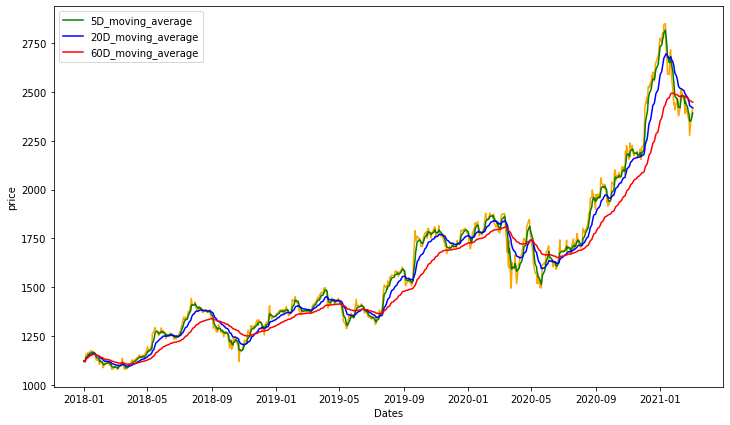

In [7]:
plt.figure(figsize=(12,7))
plt.plot(df_AP.index,df_AP['Adj Close'],color='orange')
plt.plot(df_AP.index,df_AP['shortma'],color='green', label = '5D_moving_average')
plt.plot(df_AP.index,df_AP['midma'],color='blue',label = '20D_moving_average')
plt.plot(df_AP.index,df_AP['longma'],color='red',label = '60D_moving_average')
plt.xlabel('Dates')
plt.ylabel("price")
plt.legend()
plt.show()

In [8]:
### creating a function to determine when to buy or sell
# assumptions are you can not short sell and you need to buy and sell same amount of shares all the time
# you can easily change the assumptions by removing flag condition in if and elif statements

In [9]:
def buy_sell(df):
    buy_lst = []
    sell_lst = []
    flag = 0

    for i in range(len(df)):

        if df['longma'][i] > df['shortma'][i] and flag != 0:
            sell_lst.append(df['Adj Close'][i])
            buy_lst.append(np.nan) 
            flag = 0
        elif df['midma'][i] > df['longma'][i] > df['shortma'][i] and flag != 0:
            sell_lst.append(df['Adj Close'][i])
            buy_lst.append(np.nan) 
            flag = 0    

        elif df['shortma'][i] > df['midma'][i] > df['longma'][i] and flag != 1:
            buy_lst.append(df['Adj Close'][i])
            sell_lst.append(np.nan)
            flag = 1
           
        elif df['shortma'][i] > df['midma'][i] and flag != 1:
            buy_lst.append(df['Adj Close'][i])
            sell_lst.append(np.nan)
            flag = 1
        elif flag != 0:
            try:
                if df['shortma'][i] > df['shortma'][i+18] and np.abs(df['shortma'][i+25]/df['shortma'][i-25] - 1) < 0.01:
                    sell_lst.append(df['Adj Close'][i])
                    buy_lst.append(np.nan) 
                    flag = 0
                else:
                    buy_lst.append(np.nan)
                    sell_lst.append(np.nan)
            except:
                buy_lst.append(np.nan)
                sell_lst.append(np.nan)
      
       
        else:
            buy_lst.append(np.nan)
            sell_lst.append(np.nan)
           
            
    return (buy_lst),(sell_lst)
            
            

In [10]:
df_AP['buy_price'] = buy_sell(df_AP)[0]
df_AP['sell_price'] = buy_sell(df_AP)[1]

In [11]:
### green marker shows the time to buy and red to sell

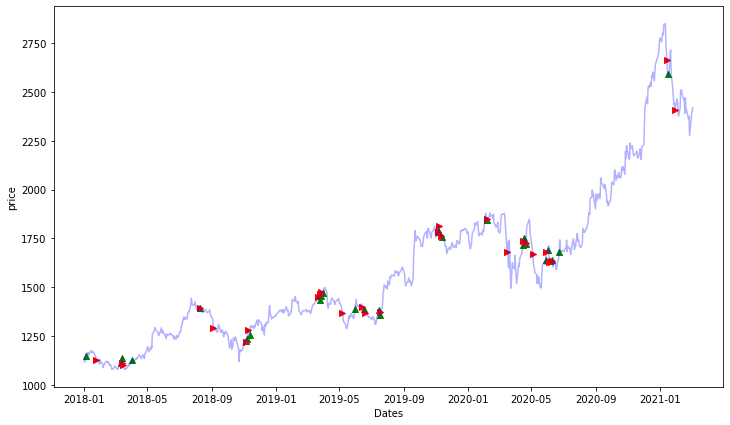

In [12]:
plt.figure(figsize=(12,7))
plt.plot(df_AP.index,df_AP['Adj Close'],color='blue',alpha = 0.3)
plt.scatter(df_AP.index,df_AP['buy_price'],color='green', marker = '^', alpha = 1)
plt.scatter(df_AP.index,df_AP['sell_price'],color='red', marker = '>', alpha = 1)
plt.xlabel('Dates')
plt.ylabel('price')
plt.show()

In [13]:
buy_list = pd.Series(buy_sell(df_AP)[0])
sell_list = pd.Series(buy_sell(df_AP)[1])


In [14]:
buy_list.dropna(inplace=True)
sell_list.dropna(inplace=True)


In [15]:
# profit you will get if you would follow this stretagy, excluding taxes and other fees
profit = sell_list.values - buy_list.values
profit.sum()

1352.97265625

In [16]:
# profit you would get if you simply buy at the starting and sell at the end of the period
df_AP['Adj Close'][-1] - df_AP['Adj Close'][0]

1294.9683837890625